# Value at Risk - Varians Kovarians

Tidak ada cara untuk menghilangkan risiko sepenuhnya dalam kehidupan. Setiap saat kita dihadapi oleh risiko yang berbeda-beda. Mengendarai sepeda motor berisiko terjadi kecelakaan, memakan sesuatu berisiko tersedak, bertemu dengan seseorang berisiko kehilangannya. Manusia tidak dapat menghindari risiko, namun dapat mengelolanya dengan bijak. Hal yang serupa juga terjadi jika kita memutuskan untuk berinvestasi. Risiko yang dapat terjadi dalam berinvestasi (kerugian) dapat dikelola sehingga kita dapat membuat keputusan yang baik dalam menanamkan modal.

Dalam manajemen risiko, *Value at Risk* atau biasa disingkat dengan VaR merupakan kerugian maksimum yang tak akan dilewati untuk suatu probabilitas yang didefinisikan sebagai tingkat kepercayaan (*confidence level*) selama periode waktu tertentu. VaR umum digunakan untuk mengukur risiko pasar dari portofolio. Suatu portofolio saham beranggotakan kumpulan dari aset berbagai perusahaan dengan bobot tertentu.

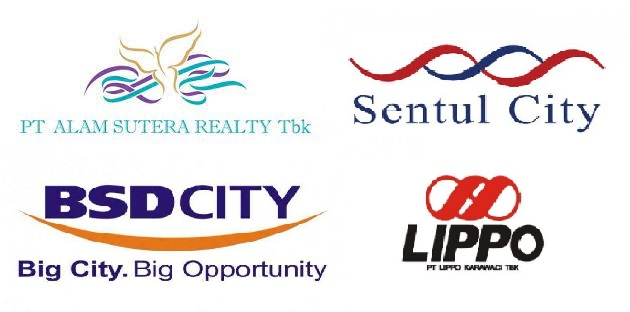


Dalam kasus ini, kita akan mengukur nilai VaR dari perusahaan subsektor properti dan *real estate* yang termasuk ke dalam Indeks LQ45. Terdapat empat perusahaan subsektor properti dan *real estate* dalam Indeks LQ45 , yaitu: Alam Sutera Reality, Sentul City, Bumi Serpong Damai, dan Lippo Karawaci. Portofolio yang akan dibentuk berisi empat perusahaan tersebut dengan bobot masing-masing 25%. Saya menggunakan bahasa pemrograman Python untuk studi kasus ini dan memakai langkah-langkah dari video oleh *channel* YouTube: [Financial Programming with Ritvik](https://www.youtube.com/watch?v=hdEp8A90RdM) dan sumber dari blog [Quantinsti](https://blog.quantinsti.com/calculating-covariance-matrix-portfolio-variance/).

## 1. Import packages

*Package* yang akan digunakan adalah yfinance, numpy, matplotlib dan norm dari scipy.stats. Pastikan sudah menginstall *package* yfinance terlebih dahulu ya!

In [ ]:
!pip install yfinance

     |████████████████████████████████| 6.3 MB 41.6 MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.63-py2.py3-none-any.whl size=23918 sha256=fdcb4c928c4e4581126504f94eeecf711797af677aaccc619c7970fe061433b5
  Stored in directory: /root/.cache/pip/wheels/fe/87/8b/7ec24486e001d3926537f5f7801f57a74d181be25b11157983
Successfully built yfinance
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [ ]:
import yfinance as yf
import numpy as np, datetime as dt
import matplotlib.pyplot as plt
from scipy.stats import norm

## 2. Membuat portofolio

Kita akan membuat portofolio yang mengandung empat perusahaan yaitu: Alam Sutera Reality (ASRI), Sentul City (BKSL), Bumi Serpong Damai (BSDE), dan Lippo Karawaci (LPKR) dengan bobot masing-masing 25%.

In [ ]:
stocks = ['ASRI.JK','BKSL.JK','BSDE.JK','LPKR.JK']
weights = np.array([0.25,0.25,0.25,0.25])

## 3. Mengunduh Data Harga Saham Harian

Setelah itu, kita dapat mengunduh data harga saham harian dari tanggal 1 Januari 2020 sampai dengan hari ini (per tanggal 15 Oktober 2021).

In [ ]:
mulai = dt.datetime(2020,1,1)
akhir = dt.datetime.now()

Jika kita mencoba download data ASRI menggunakan yfinance, maka akan terlihat beberapa data seperti pada output di bawah ini. Kita akan gunakan data 'Adj Close' yang merupakan harga saham penutupan.

In [ ]:
yf.download('ASRI.JK',mulai,akhir)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,238.0,240.0,236.0,238.0,238.0,3323600
2020-01-03,238.0,240.0,236.0,236.0,236.0,15815400
2020-01-06,236.0,236.0,232.0,234.0,234.0,3246300
2020-01-07,236.0,238.0,232.0,236.0,236.0,3340600
2020-01-08,236.0,236.0,230.0,232.0,232.0,2501900
...,...,...,...,...,...,...
2021-10-11,191.0,194.0,189.0,189.0,189.0,52551200
2021-10-12,190.0,204.0,188.0,197.0,197.0,193820700
2021-10-13,198.0,200.0,193.0,194.0,194.0,59625100


In [ ]:
data = yf.download(stocks, mulai, akhir)['Adj Close']
print(data)

[*********************100%***********************]  4 of 4 completed
            ASRI.JK  BKSL.JK  BSDE.JK  LPKR.JK
Date                                          
2020-01-02    238.0     83.0   1270.0    232.0
2020-01-03    236.0     85.0   1290.0    236.0
2020-01-06    234.0     81.0   1280.0    236.0
2020-01-07    236.0     83.0   1250.0    238.0
2020-01-08    232.0     81.0   1220.0    236.0
...             ...      ...      ...      ...
2021-10-11    189.0     62.0   1080.0    159.0
2021-10-12    197.0     66.0   1110.0    159.0
2021-10-13    194.0     63.0   1115.0    160.0
2021-10-14    195.0     63.0   1120.0    160.0
2021-10-15    196.0     64.0   1145.0    161.0

[436 rows x 4 columns]


## 4. Menghitung Nilai Return

*Return* harian dari saham dapat dicari memakai rumus:

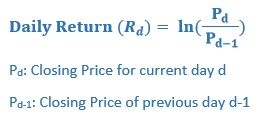

Dengan Python, kita dapat gunakan perintah:

In [ ]:
returns = data.pct_change()
print(returns)

             ASRI.JK   BKSL.JK   BSDE.JK   LPKR.JK
Date                                              
2020-01-02       NaN       NaN       NaN       NaN
2020-01-03 -0.008403  0.024096  0.015748  0.017241
2020-01-06 -0.008475 -0.047059 -0.007752  0.000000
2020-01-07  0.008547  0.024691 -0.023438  0.008475
2020-01-08 -0.016949 -0.024096 -0.024000 -0.008403
...              ...       ...       ...       ...
2021-10-11 -0.005263  0.016393 -0.018182  0.012739
2021-10-12  0.042328  0.064516  0.027778  0.000000
2021-10-13 -0.015228 -0.045455  0.004505  0.006289
2021-10-14  0.005155  0.000000  0.004484  0.000000
2021-10-15  0.005128  0.015873  0.022321  0.006250

[436 rows x 4 columns]


## 5. Membuat Matrix Varians-Kovarians

Untuk membuat matriks varians kovarians, kita gunakan:

In [ ]:
cov_matrix = returns.cov()
print(cov_matrix)

          ASRI.JK   BKSL.JK   BSDE.JK   LPKR.JK
ASRI.JK  0.001642  0.000097  0.000794  0.000817
BKSL.JK  0.000097  0.000858  0.000092  0.000016
BSDE.JK  0.000794  0.000092  0.001174  0.000478
LPKR.JK  0.000817  0.000016  0.000478  0.001422


Dalam matriks tersebut dapat dilihat bahwa nilai kovarian saham berada di nilai positif, tidak ada nilai kovarian yang bernilai nol sehingga dapat dikatakan tidak ada saham yang independen.

## 6. Menghitung Expected Return Portofolio

Rumus untuk menghitung *expected return* dari portofolio:

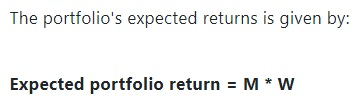

Untuk mencari nilai M, perlu dihitung *mean* dari return tiap saham dengan:

In [ ]:
avg_returns = returns.mean()
print(avg_returns)

ASRI.JK    0.000333
BKSL.JK   -0.000184
BSDE.JK    0.000329
LPKR.JK   -0.000154
dtype: float64


Setelah itu, dapat dihitung nilai *expected return* portofolio harian dengan:

In [ ]:
port_mean = avg_returns @ weights
print("Expected Return Portofolio Harian Sebesar = {}".format(port_mean))

Expected Return Portofolio Harian Sebesar = 8.106065695794002e-05


## 7. Menghitung Varians dan Standar Deviasi Portofolio


Rumus untuk menghitung varians dari portofolio:

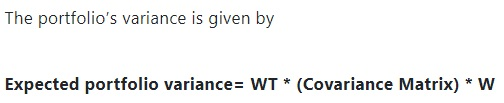

Untuk mencari nilai varians dan standar deviasi (volatilitas) dari portofolio, kita dapat gunakan perintah:

In [ ]:
port_var = weights.T @ cov_matrix @ weights
print("Expected Variance Portofolio Sebesar = {}".format(port_var))

Expected Variance Portofolio Sebesar = 0.0006053225854271451


In [ ]:
port_std = np.sqrt(port_var)
print("Standar Deviasi / Volatilitas Portofolio Sebesar = {}".format(port_std))

Standar Deviasi / Volatilitas Portofolio Sebesar = 0.024603304359925825


Ini menerangkan bahwa setiap saham dalam portofolio dengan porsi yang sama (25%) dapat meminimalisir risiko sampai 0.0246 atau 2,46%.

## 8. Membuat Kurva Distribusi Normal Portofolio

Karena metode varians kovarians dalam perhitungan VaR berdasarkan asumsi bahwa *return* dan nilai portofolio berdistribusi normal, maka kita akan membuat kurva untuk melihat normalitas dari portofolio.

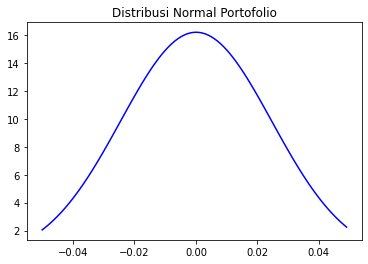

In [ ]:
dist = np.arange(-0.05, 0.05, 0.001)
norm_dist = norm.pdf(dist, port_mean, port_std)
plt.plot(dist, norm_dist, color = 'b')
plt.title('Distribusi Normal Portofolio')
plt.show()

Dapat dilihat pada kurva bahwa data berdistribusi normal secara visual.

## 9. Nilai Value at Risk Harian

Untuk mencari nilai VaR harian, kita dapat gunakan:

In [ ]:
significance_level = 0.05
VaR = norm.ppf(significance_level, port_mean, port_std)
print("Value at Risk Portofolio Harian Sebesar = {}".format(VaR))

Value at Risk Portofolio Harian Sebesar = -0.04038777375445704


Pada tingkat kepercayaan 95% diperoleh nilai VaR sebesar 0.04039 atau 4,039%. Ini berarti ada keyakinan sebesar 95% bahwa kerugian yang akan diterima investor tidak akan melebihi 4,039% dari total uang yang diinvestasikan.

## 10. Nilai Value at Risk dalam n-hari

Jika ingin mencari nilai VaR dalam n-hari (misalnya 30 hari atau sebulan), kita dapat gunakan:

In [ ]:
jumlah_hari = 30
VaR_30 = VaR * np.sqrt(jumlah_hari)
print("Value at Risk Portofolio Selama 30 hari Sebesar = {}".format(VaR_30))

Value at Risk Portofolio Selama 30 hari Sebesar = -0.22121294732731236


Pada tingkat kepercayaan 95% diperoleh nilai VaR selama 30 hari sebesar 0.22121 atau 22,121%. Ini berarti ada keyakinan sebesar 95% bahwa kerugian yang akan diterima investor tidak akan melebihi 22,121% dari total uang yang diinvestasikan.

## Kesimpulan

Portofolio yang disusun mengandung empat emiten subsektor properti dan *real estate* (ASRI, BKSL, BSDE, dan LPKR) dengan bobot masing-masing 25%. Dalam kasus ini, nilai *Value at Risk* dihitung menggunakan metode varians kovarians. Diperoleh nilai VaR harian sebesar 4,039%. Ini berarti apabila dana awal yang diinvestasikan pada portofolio tersebut sebesar Rp100.000.000 maka ada keyakinan sebesar 95% bahwa kerugian yang akan diterima investor tidak akan melebihi Rp22.121.000. Didapatkan juga nilai VaR selama 30 hari yaitu sebesar 22.121% yang berarti bahwa kerugian yang akan diterima investor tidak akan melebihi Rp22.121.000 apabila menginvestasikan dana sebesar Rp100.000.000 selama 30 hari pada portofolio tersebut.